In [1]:
#Definition: This program uses The Moving Average Convergence DIvergence (MACD) crossover to determine when to buy ad sell stock.

In [2]:
#import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [12]:
#Store the data in a dataframe: 
df=pd.read_csv('C:/Users/franc/Desktop/Google Colab/Data/AAPL.csv')
#set the date to be the index:
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
2019-07-03,2019-07-03,203.279999,204.440002,202.690002,204.410004,201.999237,11362000
2019-07-05,2019-07-05,203.350006,205.080002,202.899994,204.229996,201.821350,17265500
2019-07-08,2019-07-08,200.809998,201.399994,198.410004,200.020004,197.661011,25338600
2019-07-09,2019-07-09,199.199997,201.509995,198.809998,201.240005,198.866638,20578000
2019-07-10,2019-07-10,201.850006,203.729996,201.559998,203.229996,200.833160,17897100
...,...,...,...,...,...,...,...
2020-06-26,2020-06-26,364.410004,365.320007,353.019989,353.630005,353.630005,51314200
2020-06-29,2020-06-29,353.250000,362.170013,351.279999,361.779999,361.779999,32661500
2020-06-30,2020-06-30,360.079987,365.980011,360.000000,364.799988,364.799988,35055800
2020-07-01,2020-07-01,365.119995,367.359985,363.910004,364.109985,364.109985,27684300


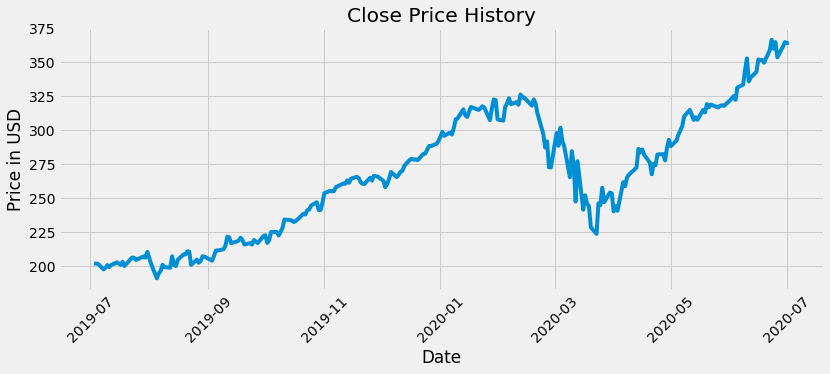

In [4]:
#Visually show the stock price:
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Adj Close'], label='Close')
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.show();

In [5]:
#Calculate the MACF and signal line indicators 
#Calculate 
ShortEMA=df.Close.ewm(span=12, adjust=False).mean()
#Calculate the long ema
LongEMA= df.Close.ewm(span=26, adjust=False).mean()
#Calculate the MACD line
MACD=ShortEMA - LongEMA
#Calculate the signal Line
signal = MACD.ewm(span=9, adjust=False).mean()

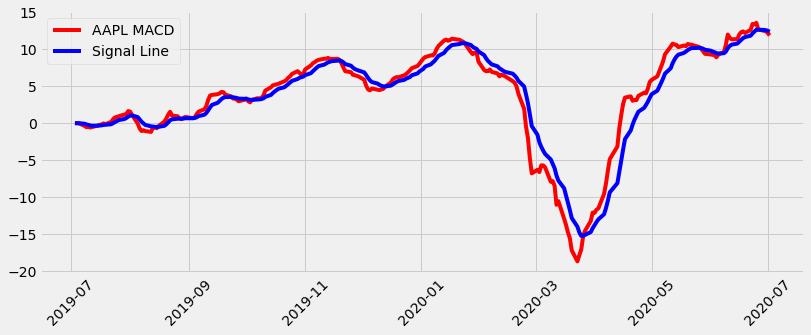

In [6]:
#Plot
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, MACD, label='AAPL MACD', color='red')
plt.xticks(rotation=45)
plt.plot(df.index, signal, label='Signal Line', color='blue')
plt.legend(loc='upper left')
plt.show();

In [7]:
#create new columns for new data 
df['MACD']=MACD
df['Signal Line']= signal
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
2019-07-03,2019-07-03,203.279999,204.440002,202.690002,204.410004,201.999237,11362000,0.000000,0.000000
2019-07-05,2019-07-05,203.350006,205.080002,202.899994,204.229996,201.821350,17265500,-0.014360,-0.002872
2019-07-08,2019-07-08,200.809998,201.399994,198.410004,200.020004,197.661011,25338600,-0.361286,-0.074555
2019-07-09,2019-07-09,199.199997,201.509995,198.809998,201.240005,198.866638,20578000,-0.531656,-0.165975
2019-07-10,2019-07-10,201.850006,203.729996,201.559998,203.229996,200.833160,17897100,-0.500331,-0.232846
...,...,...,...,...,...,...,...,...,...
2020-06-26,2020-06-26,364.410004,365.320007,353.019989,353.630005,353.630005,51314200,12.657673,12.620160
2020-06-29,2020-06-29,353.250000,362.170013,351.279999,361.779999,361.779999,32661500,12.462290,12.588586
2020-06-30,2020-06-30,360.079987,365.980011,360.000000,364.799988,364.799988,35055800,12.408103,12.552489
2020-07-01,2020-07-01,365.119995,367.359985,363.910004,364.109985,364.109985,27684300,12.169203,12.475832


In [8]:
#Create a funciotn to signal when to buy and sell an asset
def buy_sell(signal):
  Buy=[]
  Sell=[]
  flag=-1

  for i in range(0,len(signal)):
    if signal['MACD'][i] > signal['Signal Line'][i]:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(signal['Close'][i])
        flag=1
      else:
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal Line'][i]:
      Buy.append(np.nan)
      if flag != 0:
        Sell.append(signal['Close'][i])
        flag=0
      else:
        Sell.append(np.nan)
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)
  return (Buy, Sell)

In [9]:
#Create buy and sell column
a=buy_sell(df)
df['Buy_Signal_Price']=a[0]
df['Sell_Signal_Price']=a[1]
#show the data 
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2019-07-03,2019-07-03,203.279999,204.440002,202.690002,204.410004,201.999237,11362000,0.000000,0.000000,NaN,NaN
2019-07-05,2019-07-05,203.350006,205.080002,202.899994,204.229996,201.821350,17265500,-0.014360,-0.002872,NaN,204.229996
2019-07-08,2019-07-08,200.809998,201.399994,198.410004,200.020004,197.661011,25338600,-0.361286,-0.074555,NaN,NaN
2019-07-09,2019-07-09,199.199997,201.509995,198.809998,201.240005,198.866638,20578000,-0.531656,-0.165975,NaN,NaN
2019-07-10,2019-07-10,201.850006,203.729996,201.559998,203.229996,200.833160,17897100,-0.500331,-0.232846,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,2020-06-26,364.410004,365.320007,353.019989,353.630005,353.630005,51314200,12.657673,12.620160,NaN,NaN
2020-06-29,2020-06-29,353.250000,362.170013,351.279999,361.779999,361.779999,32661500,12.462290,12.588586,NaN,361.779999
2020-06-30,2020-06-30,360.079987,365.980011,360.000000,364.799988,364.799988,35055800,12.408103,12.552489,NaN,NaN
2020-07-01,2020-07-01,365.119995,367.359985,363.910004,364.109985,364.109985,27684300,12.169203,12.475832,NaN,NaN


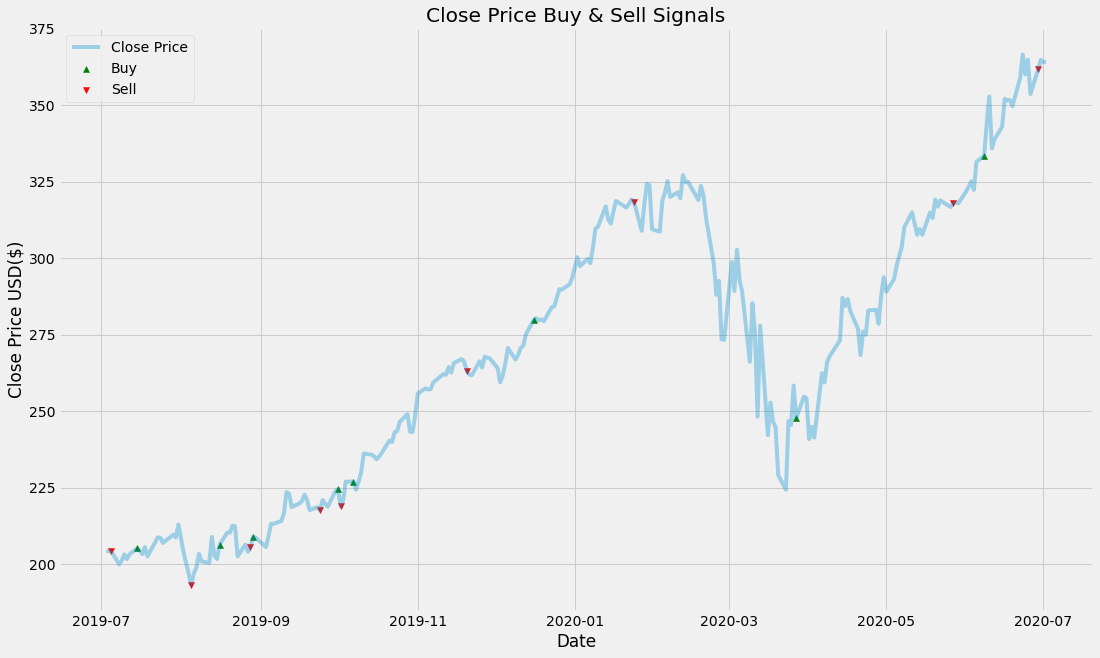

In [11]:
#Visually show the stock buy and sell signals
plt.figure(figsize=(16.5, 10))
plt.scatter(df.index, df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha=1)
plt.scatter(df.index, df['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha=1)
plt.plot(df['Close'], label='Close Price', alpha=.35)
plt.title('Close Price Buy & Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price USD($)')
plt.legend(loc='upper left')
plt.show();